In [1]:
import pandas as pd
import numpy as np
import os
import warnings
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import copy
import missingno as msno
from sklearn.cluster import KMeans
%matplotlib inline 
# 기본 경로 설정
os.chdir('C:/Users/gksru/Desktop/study/Lpoint/data')
# 단위 표시 설정
pd.options.display.float_format = '{:.5f}'.format
# 폰트 설정
mpl.rc('font', family=' Malgun Gothic')
# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

warnings.filterwarnings('ignore')

In [2]:
online_df = pd.read_csv('제6회 L.POINT Big Data Competition-분석용데이터-01.온라인 행동 정보.csv')
online_df.head()

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,tot_pag_view_ct,tot_sess_hr_v,trfc_src,dvc_ctg_nm
0,7809,1,8,5,A03,20190913,01:16,2571103,nan,NaN,34.00000,2663.00000,DIRECT,NaN
1,7809,1,4,2,A03,20190913,01:14,2485909,nan,NaN,34.00000,2663.00000,DIRECT,NaN
2,7809,1,11,5,A03,20190913,01:17,2646597,nan,NaN,34.00000,2663.00000,DIRECT,NaN
3,7809,1,1,2,A03,20190913,00:46,788304,nan,NaN,34.00000,2663.00000,DIRECT,NaN
4,7809,1,9,5,A03,20190913,01:17,2617609,nan,NaN,34.00000,2663.00000,DIRECT,NaN


In [3]:
trade_df = pd.read_csv('제6회 L.POINT Big data Competition-분석용데이터-02.거래 정보.csv')
trade_df.head()

,clnt_id,trans_id,trans_seq,biz_unit,pd_c,de_dt,de_tm,buy_am,buy_ct
0,21922,104999,1,A03,unknown,20190920,12:41,5990,1
1,21279,104907,4,A03,unknown,20190920,10:27,10900,1
2,39423,105124,11,A03,unknown,20190920,17:26,12900,1
3,18362,104010,1,A03,unknown,20190920,09:57,9900,1
4,39423,105124,13,A03,0565,20190920,17:26,2990,1


In [4]:
demo_df = pd.read_csv('제6회 L.POINT Big data Competition-분석용데이터-03.고객 Demographic 정보.csv')
demo_df.head()

,clnt_id,clnt_gender,clnt_age
0,1,unknown,unknown
1,2,F,30
2,3,unknown,unknown
3,4,unknown,unknown
4,5,unknown,unknown


In [5]:
class_df = pd.read_csv('제6회 L.POINT Big data Competition-분석용데이터-04.상품분류 정보.csv')
class_df.head()

,pd_c,clac_nm1,clac_nm2,clac_nm3
0,1,Automotive Products,Automotive Replacement Repair / Maintanance Kits,Automobile Oil / Additives
1,2,Automotive Products,Automotive Replacement Repair / Maintanance Kits,Car Lights
2,3,Automotive Products,Automotive Replacement Repair / Maintanance Kits,Car Paint
3,4,Automotive Products,Automotive Replacement Repair / Maintanance Kits,Filters
4,5,Automotive Products,Automotive Replacement Repair / Maintanance Kits,Wiper Blades


In [6]:
online_df['sess_dt'] = online_df['sess_dt'].astype('str')
online_df['sess_dt'] = online_df['sess_dt'] + online_df['hit_tm']
online_df['sess_dt'] = online_df['sess_dt'].apply(lambda x: datetime.datetime.strptime(x, '%Y%m%d%H:%M'))

In [7]:
trade_df

,clnt_id,trans_id,trans_seq,biz_unit,pd_c,de_dt,de_tm,buy_am,buy_ct
0,21922,104999,1,A03,unknown,20190920,12:41,5990,1
1,21279,104907,4,A03,unknown,20190920,10:27,10900,1
2,39423,105124,11,A03,unknown,20190920,17:26,12900,1
3,18362,104010,1,A03,unknown,20190920,09:57,9900,1
4,39423,105124,13,A03,0565,20190920,17:26,2990,1
...,...,...,...,...,...,...,...,...,...
599956,35311,2839,3,B03,0339,20190927,14:09,3500,1
599957,35311,2839,4,B03,0339,20190927,14:09,3600,2
599958,35311,2839,5,B03,0339,20190927,14:09,3500,1
599959,35311,2839,2,B03,0339,20190927,14:09,4500,1


In [8]:
trade_df['de_dt'] = trade_df['de_dt'].astype('str')
trade_df['de_dt'] = trade_df['de_dt'] + trade_df['de_tm']
trade_df['de_dt'] = trade_df['de_dt'].apply(lambda x: datetime.datetime.strptime(x, '%Y%m%d%H:%M'))

In [9]:
trade_df.dtypes

clnt_id               int64
trans_id              int64
trans_seq             int64
biz_unit             object
pd_c                 object
de_dt        datetime64[ns]
de_tm                object
buy_am                int64
buy_ct                int64
dtype: object

In [10]:
class_df.dtypes

pd_c         int64
clac_nm1    object
clac_nm2    object
clac_nm3    object
dtype: object

In [11]:
trade_drop = trade_df[trade_df['pd_c'] != 'unknown']

In [12]:
trade_drop['pd_c'] = trade_drop['pd_c'].astype('int')

In [13]:
trade_merge = trade_drop.merge(class_df, on = 'pd_c')

## 구매한 소분류 품목의 개수로 클러스터링(엉망) 

In [14]:
trade_pivot_1 = trade_merge.pivot_table(index = 'clnt_id', columns = 'clac_nm3', aggfunc = 'sum', values = 'buy_ct').fillna(0)

In [15]:
trade_pivot_1.head()

clac_nm3,,Accessory Bags,Accident Prevention Equipment,Adhesive Tapes,Adhesives,Adult's Bed Covers and Skirts,Adult's Diapers,Adult's Disposable Briefes,Adults' Bed Fillings,Adults' Bedding Sets,...,Yoga / Pilates Clothing,Yoga Mats / Exercise Mats,Yoghurts / Chunggukjang Makers,Yogurt Drinks,Young Pumpkins,Young Radishes,Yuzus / Quinces,Zipper Poly Bags / Plastic Bags,kelp,life Vests / Safety Accessories
clnt_id,,,,,,,,,,,,,,,,,,,,,
2,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
9,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000
12,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
20,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
23,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000


In [16]:
kmeans_1 = KMeans(n_clusters = 10)
kmeans_1.fit(trade_pivot_1.values)

KMeans(n_clusters=10)

In [17]:
kmeans_1.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [18]:
kmeans_1.predict(trade_pivot_1.values)

array([0, 0, 0, ..., 0, 0, 0])

In [19]:
trade_kmean_1 = pd.DataFrame(
    {
    'clnt_id': trade_pivot_1.index,
    'cluster': kmeans_1.predict(trade_pivot_1.values)
    }
)

In [20]:
trade_kmean_1['cluster'].value_counts()

0    11242
3       15
5        4
6        3
7        1
4        1
2        1
9        1
1        1
8        1
Name: cluster, dtype: int64

## 구매한 중분류 품목의 개수로 클러스터링
* 그래도 컬럼이 너무 많은데?
* 군집을 어떻게 만들지

In [21]:
trade_pivot_2 = trade_merge.pivot_table(index = 'clnt_id', columns = 'clac_nm2', aggfunc = 'sum', values = 'buy_ct').fillna(0)

In [22]:
trade_pivot_2.head()

clac_nm2,Adults' Bedding,Air Freshners / Dehumidifiers / Odor Eliminators,Air Purifiers / Humidifiers / Dehumidifiers,Alcoholic Beverage Sets,Animal Clinics,Arts / Crafts Supplies,Audios,Australian Imported Beefs,Automotive Replacement Repair / Maintanance Kits,Baby Foods,...,Women's Socks and Hosiery,Women's Special Materials Clothing,Women's Special Use Clothing,Women's Sport Shoes,Women's Underwear,Women's Upper Bodywear / Tops,Women's Wallets,Writing Pads,Writing Supplies,Yogurt
clnt_id,,,,,,,,,,,,,,,,,,,,,
2,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
9,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
12,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
20,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
23,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000


In [23]:
kmeans_2 = KMeans(n_clusters = 10)
kmeans_2.fit(trade_pivot_2.values)

KMeans(n_clusters=10)

In [24]:
kmeans_2.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [25]:
kmeans_2.predict(trade_pivot_2.values)

array([0, 0, 0, ..., 0, 0, 0])

In [26]:
trade_kmean_2 = pd.DataFrame(
    {
    'clnt_id': trade_pivot_2.index,
    'cluster': kmeans_2.predict(trade_pivot_2.values)
    }
)

In [27]:
trade_kmean_2['cluster'].value_counts()

0    11219
9       22
5       10
2        9
3        4
4        3
7        1
6        1
1        1
8        1
Name: cluster, dtype: int64

## 구매한 대분류 품목의 개수로 클러스터링

In [28]:
trade_pivot_3 = trade_merge.pivot_table(index = 'clnt_id', columns = 'clac_nm1', aggfunc = 'sum', values = 'buy_ct').fillna(0)

In [29]:
trade_pivot_3.head()

clac_nm1,Automotive Products,Baby Foods,Ball Game / Field Sports,Bedding / Handicraft,Beverages,Birth Supplies / Baby Products,Books / Records / Instruments,Canned / Jarred Foods,Cell Phones / Accessories,Chilled Foods,...,Tableware / Cooking Utensils,Tenants / Restaurants,Tobacco,Tools / Safety Supplies,Toy,Travel / Leisure Services,Underwear / Socks and Hosiery / Homewear,Vegetables,Video / Audio System Electronics,Women's Clothing
clnt_id,,,,,,,,,,,,,,,,,,,,,
2,0.00000,0.00000,0.00000,0.00000,26.00000,0.00000,0.00000,1.00000,0.00000,2.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
9,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,2.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,4.00000,0.00000,0.00000
12,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
20,0.00000,0.00000,0.00000,0.00000,13.00000,0.00000,0.00000,1.00000,0.00000,3.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,13.00000,0.00000,0.00000
23,0.00000,0.00000,0.00000,0.00000,5.00000,0.00000,0.00000,0.00000,0.00000,10.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,11.00000,0.00000,0.00000


In [30]:
kmeans_3 = KMeans(n_clusters = 10)
kmeans_3.fit(trade_pivot_3.values)

KMeans(n_clusters=10)

In [31]:
kmeans_3.predict(trade_pivot_3.values)

array([0, 0, 0, ..., 0, 0, 0])

In [32]:
trade_kmean_3 = pd.DataFrame(
    {
    'clnt_id': trade_pivot_3.index,
    'cluster': kmeans_3.predict(trade_pivot_3.values)
    }
)

In [33]:
trade_kmean_3['cluster'].value_counts()

0    11125
4       79
2       32
5       21
7        4
9        4
6        2
8        2
3        1
1        1
Name: cluster, dtype: int64

# 따라서

In [34]:
trade_df.sort_values(by = 'buy_ct', ascending = False)

,clnt_id,trans_id,trans_seq,biz_unit,pd_c,de_dt,de_tm,buy_am,buy_ct
541716,43143,6453,1,B02,0241,2019-09-04 17:44:00,17:44,4500,3600
407912,43143,6454,1,B02,1056,2019-09-04 17:46:00,17:46,2550,1600
319230,21768,121679,1,B01,0304,2019-07-27 16:45:00,16:45,98400,984
219178,64311,118788,1,B01,0721,2019-08-14 20:11:00,20:11,93100,931
221748,5370,116890,1,B01,0320,2019-08-29 20:53:00,20:53,93000,930
...,...,...,...,...,...,...,...,...,...
349423,7740,123215,1,B01,0546,2019-09-28 17:32:00,17:32,5051,0
288164,72267,124955,15,B01,1604,2019-09-01 17:32:00,17:32,899,0
277857,29530,140873,2,B01,0970,2019-07-20 21:32:00,21:32,7637,0
267753,18947,115960,2,B01,1142,2019-08-09 21:11:00,21:11,11260,0


In [42]:
trade_df['buy_am'].describe()

count         599961.00000
mean          342645.61028
std        182579985.14713
min                0.00000
25%             1990.00000
50%             3500.00000
75%             6980.00000
max     100000016899.00000
Name: buy_am, dtype: float64

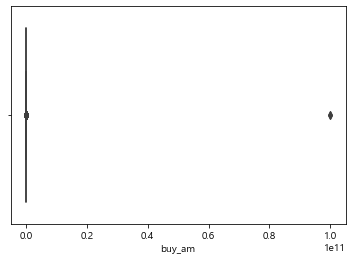

In [37]:
sns.boxplot(trade_df['buy_am'])
plt.show()

In [44]:
#buy_IQR = trade_df['buy_am'].describe()['75%'] - trade_df['buy_am'].describe()['25%']

In [45]:
# buy_IQR_up = trade_df['buy_am'].describe()['75%'] + 1.5 * buy_IQR
# buy_IQR_down = trade_df['buy_am'].describe()['25%'] - 1.5 * buy_IQR

# trade_df[(trade_df['buy_am'] < buy_IQR_down) | (trade_df['buy_am'] > buy_IQR_up)]

In [46]:
trade_buy = trade_df[trade_df['buy_am'] > 0]

### Clnt ID로 그루핑
* Recency : 최근 거래 일자
* Frequency는 : 거래 count
* Monetary : 총 거래액

In [47]:
aggregations = {
    'de_dt': 'max',
    'trans_id': 'count',
    'buy_am':'sum'
}

cust_df = trade_buy.groupby('clnt_id').agg(aggregations)

# groupby된 결과 컬럼값을 Recency, Frequency, Monetary로 변경
cust_df = cust_df.rename(columns = {'de_dt':'Recency',
                                    'trans_id':'Frequency',
                                    'buy_am':'Monetary'
                                   }
                        )
cust_df = cust_df.reset_index()
cust_df.head(3)

,clnt_id,Recency,Frequency,Monetary
0,2,2019-08-30 22:00:00,12,157100
1,9,2019-09-14 16:27:00,39,339941
2,12,2019-09-21 14:30:00,6,44300


### 최근 구매 일자를 days로 변환

In [48]:
cust_df['Recency'] = datetime.datetime(2019,10,1) - cust_df['Recency']
cust_df['Recency'] = cust_df['Recency'].apply(lambda x: x.days+1)
cust_df.head(3)

,clnt_id,Recency,Frequency,Monetary
0,2,32,12,157100
1,9,17,39,339941
2,12,10,6,44300


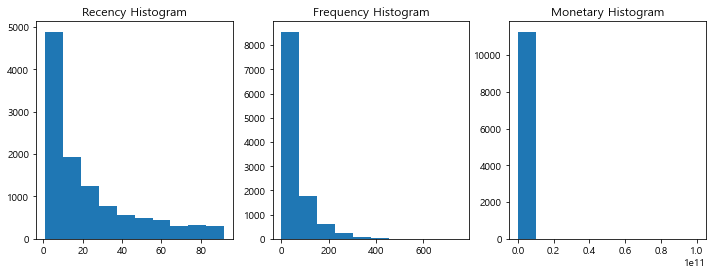

In [49]:
fig, (ax1,ax2,ax3) = plt.subplots(figsize=(12,4), nrows=1, ncols=3)
ax1.set_title('Recency Histogram')
ax1.hist(cust_df['Recency'])

ax2.set_title('Frequency Histogram')
ax2.hist(cust_df['Frequency'])

ax3.set_title('Monetary Histogram')
ax3.hist(cust_df['Monetary'])

plt.show()

In [50]:
cust_df[['Recency','Frequency','Monetary']].describe()

,Recency,Frequency,Monetary
count,11277.00000,11277.00000,11277.00000
mean,22.35266,53.08947,18229493.92498
std,23.07614,67.50737,1331701646.58965
min,1.00000,1.00000,10.00000
25%,5.00000,6.00000,102750.00000
50%,13.00000,27.00000,259240.00000
75%,32.00000,74.00000,572090.00000
max,92.00000,757.00000,100003264203.00000


In [56]:
# cust_df = cust_df[cust_df['Monetary'] < 1000000]

### 군집화 후에 실루엣 계수 평가

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

X_features = cust_df[['Recency','Frequency','Monetary']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

kmeans = KMeans(n_clusters=7, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)
cust_df['cluster_label'] = labels

print('실루엣 스코어는 : {0:.3f}'.format(silhouette_score(X_features_scaled,labels)))

실루엣 스코어는 : 0.452


In [54]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성  
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    import random
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [55]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 클러스터링 결과를 시각화 
def visualize_kmeans_plot_multi(cluster_lists, X_features):
    
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])
    
     # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster']=cluster_labels
        
        unique_labels = np.unique(clusterer.labels_)
        markers=['o', 's', '^', 'x', '*']
       
        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)           
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                        edgecolor='k', marker=markers[label], label=cluster_legend)

        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))    
        axs[ind].legend(loc='upper right')
    
    plt.show()

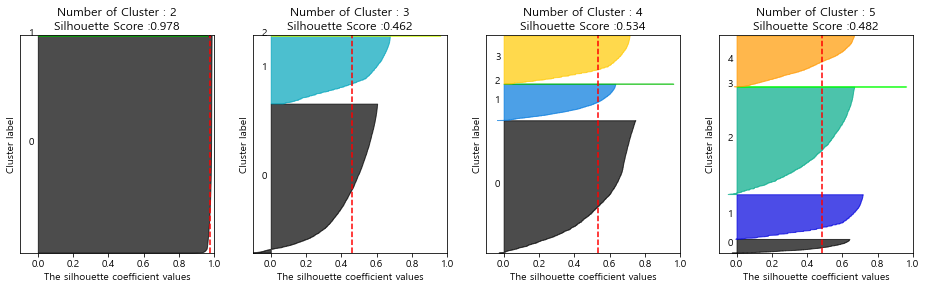

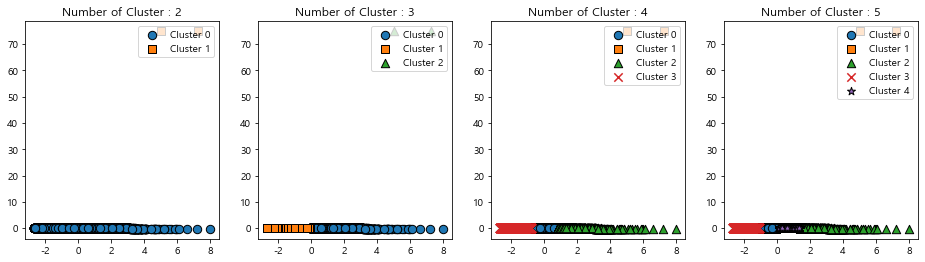

In [57]:
visualize_silhouette([2,3,4,5],X_features_scaled)
visualize_kmeans_plot_multi([2,3,4,5],X_features_scaled)

In [160]:
cluster_labels

array([0, 0, 0, ..., 0, 0, 0])

In [163]:
clusterer

KMeans(max_iter=500, n_clusters=1, random_state=0)

In [171]:
cluster_labels

array([2, 2, 2, ..., 2, 2, 4])

In [58]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성  

    
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples

X_features = cust_df[['Recency','Frequency','Monetary']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math
import random

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(X_features)
dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])
# KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
clusterer = KMeans(n_clusters = 4, max_iter=500, random_state=0)
cluster_labels = clusterer.fit_predict(X_features_scaled)

sil_avg = silhouette_score(X_features_scaled, cluster_labels)
sil_values = silhouette_samples(X_features_scaled, cluster_labels)
    

In [60]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(X_features)
dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])

In [65]:
dataframe

,PCA1,PCA2
0,-18072393.92498,-42.11210
1,-17889552.92498,-12.93524
2,-18185193.92498,-44.23967
3,-17981123.92498,-4.27328
4,-18026529.92498,0.30841
...,...,...
11272,-17190543.92498,-31.30928
11273,-17926783.92498,-48.44559
11274,-17756923.92498,3.51407
11275,-17727493.92498,-47.88341


In [176]:
# ### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성  

    
# from sklearn.datasets import make_blobs
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_samples, silhouette_score
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import silhouette_score, silhouette_samples

# X_features = cust_df[['Recency','Frequency','Monetary']].values
# X_features_scaled = StandardScaler().fit_transform(X_features)

# import matplotlib.pyplot as plt
# import matplotlib.cm as cm
# import math
# import random
# result_list = []

# # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
# epoch_num = 100

# for epoch in range(epoch_num):
#     r = random.randint(0,500)

#     # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
#     clusterer = KMeans(n_clusters = 4, max_iter=500, random_state=r)
#     cluster_labels = clusterer.fit_predict(X_features_scaled)

#     sil_avg = silhouette_score(X_features_scaled, cluster_labels)
#     sil_values = silhouette_samples(X_features_scaled, cluster_labels)
#     result = {
#         'sil_avg': sil_avg,
#         'random_state': r,
#     }
#     result_list.append(result)
#     print(f'epoch = {epoch} sil_avg = {sil_avg:.7f}  random_state = {r}' )
# result_df = pd.DataFrame.from_dict(result_list)
# result_df = result_df.sort_values(by = 'sil_avg', ascending = False)

epoch = 0 sil_avg = 0.5342101  random_state = 322
epoch = 1 sil_avg = 0.5341996  random_state = 239
epoch = 2 sil_avg = 0.5341996  random_state = 354
epoch = 3 sil_avg = 0.5342080  random_state = 474
epoch = 4 sil_avg = 0.5341996  random_state = 49
epoch = 5 sil_avg = 0.5346149  random_state = 337
epoch = 6 sil_avg = 0.5341996  random_state = 143
epoch = 7 sil_avg = 0.5341996  random_state = 312
epoch = 8 sil_avg = 0.5342876  random_state = 17
epoch = 9 sil_avg = 0.5341996  random_state = 257
epoch = 10 sil_avg = 0.5341989  random_state = 460
epoch = 11 sil_avg = 0.5341996  random_state = 156
epoch = 12 sil_avg = 0.5342101  random_state = 277
epoch = 13 sil_avg = 0.5342761  random_state = 357
epoch = 14 sil_avg = 0.5342080  random_state = 259
epoch = 15 sil_avg = 0.5341996  random_state = 121
epoch = 16 sil_avg = 0.5341996  random_state = 37
epoch = 17 sil_avg = 0.5342080  random_state = 216
epoch = 18 sil_avg = 0.5341996  random_state = 103
epoch = 19 sil_avg = 0.5341996  random_state

In [181]:
# ### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성  

    
# from sklearn.datasets import make_blobs
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_samples, silhouette_score
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import silhouette_score, silhouette_samples

# X_features = cust_df[['Recency','Frequency','Monetary']].values
# X_features_scaled = StandardScaler().fit_transform(X_features)

# import matplotlib.pyplot as plt
# import matplotlib.cm as cm
# import math
# import random
# result_list = []

# # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
# epoch_num = 100

# for epoch in range(epoch_num):
#     r = random.randint(0,500)

#     # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
#     clusterer = KMeans(n_clusters = 5, max_iter=500, random_state=r)
#     cluster_labels = clusterer.fit_predict(X_features_scaled)

#     sil_avg = silhouette_score(X_features_scaled, cluster_labels)
#     sil_values = silhouette_samples(X_features_scaled, cluster_labels)
#     result = {
#         'sil_avg': sil_avg,
#         'random_state': r,
#     }
#     result_list.append(result)
#     print(f'epoch = {epoch} sil_avg = {sil_avg:.7f}  random_state = {r}' )
# result_df = pd.DataFrame.from_dict(result_list)

epoch = 0 sil_avg = 0.4817594  random_state = 24
epoch = 1 sil_avg = 0.4795464  random_state = 377
epoch = 2 sil_avg = 0.4812701  random_state = 396
epoch = 3 sil_avg = 0.4817925  random_state = 378
epoch = 4 sil_avg = 0.4815324  random_state = 397
epoch = 5 sil_avg = 0.4810881  random_state = 319
epoch = 6 sil_avg = 0.4819198  random_state = 493
epoch = 7 sil_avg = 0.4817420  random_state = 160
epoch = 8 sil_avg = 0.4802890  random_state = 272
epoch = 9 sil_avg = 0.4817925  random_state = 224
epoch = 10 sil_avg = 0.4802110  random_state = 299
epoch = 11 sil_avg = 0.4801119  random_state = 394
epoch = 12 sil_avg = 0.4803638  random_state = 301
epoch = 13 sil_avg = 0.4812701  random_state = 396
epoch = 14 sil_avg = 0.4800818  random_state = 141
epoch = 15 sil_avg = 0.4818892  random_state = 341
epoch = 16 sil_avg = 0.4817420  random_state = 57
epoch = 17 sil_avg = 0.4803578  random_state = 75
epoch = 18 sil_avg = 0.4810535  random_state = 348
epoch = 19 sil_avg = 0.4810680  random_state

전체 고객 : 72399명<br>
거래 데이터에 있는 고객 : **11277명**

11277명에 대한 군집 형성은 가능한데, 나머지 6만명에 대한 분석은?

In [ ]:
# from sklearn.cluster import KMeans
# from sklearn.decomposition import PCA
# import pandas as pd
# import numpy as np
# pca = PCA(n_components=2)
# pca_transformed = pca.fit_transform(X_features)
# dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])
# # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장. 
# plt.figure(figsize=(20,10))
# clusterer = KMeans(n_clusters = 5, max_iter=500, random_state=0)
# cluster_labels = clusterer.fit_predict(pca_transformed)
# dataframe['cluster']=cluster_labels

# unique_labels = np.unique(clusterer.labels_)
# markers=['o', 's', '^', 'x', '*']

# # 클러스터링 결과값 별로 scatter plot 으로 시각화
# for label in unique_labels:
#     if label != 2:
#         continue
#     label_df = dataframe[dataframe['cluster']==label]
#     if label == -1:
#         cluster_legend = 'Noise'
#     else :
#         cluster_legend = 'Cluster '+str(label)  
        
#     plt.scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
#                 edgecolor='k', marker=markers[label], label=cluster_legend)